In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Figure size 600x300 with 0 Axes>

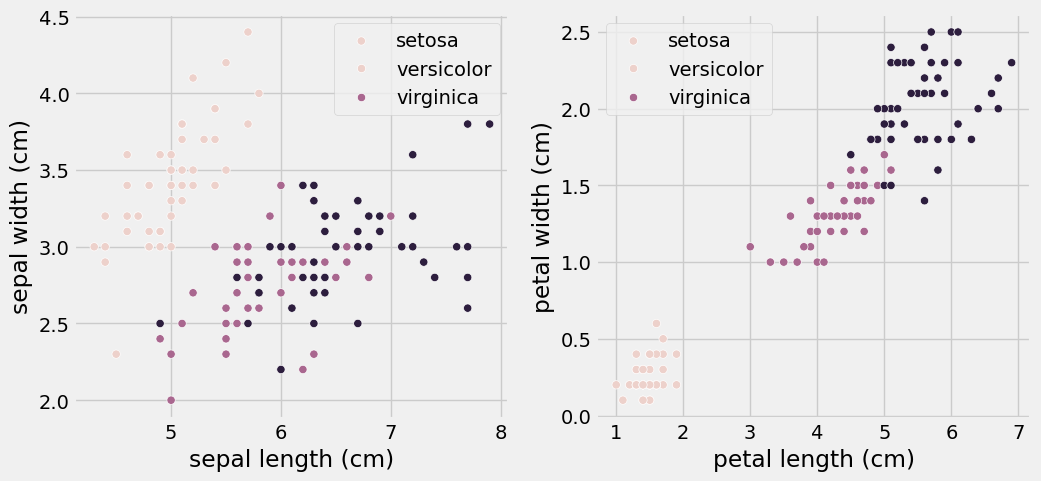

In [4]:
plt.figure(figsize=(6,3))
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11, 5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=iris.target, data=iris_df, ax=ax1)
ax1.legend(labels=['setosa', 'versicolor', 'virginica'])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue=iris.target, data=iris_df, ax=ax2)
ax2.legend(labels=['setosa', 'versicolor', 'virginica'])

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
train_df = pd.DataFrame(data=X_train, columns=iris.feature_names)
train_df['target'] = pd.Series(y_train)
train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.212398,-1.023307,-0.182954,-0.299464,1
1,-1.782734,-0.094786,-1.440761,-1.348683,0
2,-1.661939,-1.719697,-1.440761,-1.217531,0
3,0.995553,0.601604,1.074853,1.667820,2
4,-0.937169,-1.255437,-0.468819,-0.168312,1


In [10]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = clf.predict(X_test)
print(f"Accuracy score: {(accuracy_score(y_test, y_pred)*100):.2f}%")

Accuracy score: 96.67%


<Axes: >

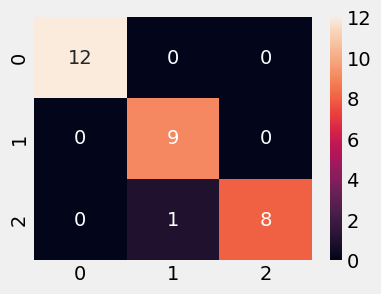

In [12]:
conf_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_m, annot=True)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

